In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
main_train = pd.read_csv("train.csv")
main_test = pd.read_csv("test.csv")
main_target_link = pd.read_csv("sample_submission.csv")

In [2]:
main_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
main_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
main_target_link.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


<AxesSubplot:>

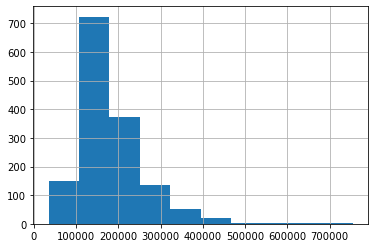

In [5]:
main_train["SalePrice"].hist()

<AxesSubplot:>

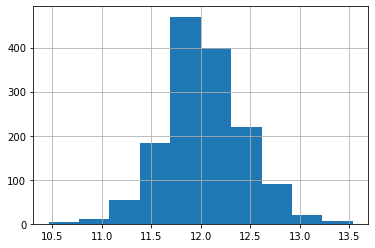

In [6]:
np.log(main_train['SalePrice']).hist()

## Test-Train data comparison

In [7]:
#Check data types count
print(main_train.dtypes.value_counts())
print(main_test.dtypes.value_counts())
main_train.isna().mean().sort_values(ascending = False)

object     43
int64      35
float64     3
dtype: int64
object     43
int64      26
float64    11
dtype: int64


PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [8]:
correlation = main_train.corr()
main_train_corr = correlation['SalePrice'].sort_values(ascending = False)[1:][:20]
main_train_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

## Functions

In [9]:
def custmDrop(df):
    res = df
    for col in df.columns:
        if (len(df[col].unique()) == 1 or df[col].isna().mean()>0.3):
            res = res.drop(col,inplace=False,axis=1)
    return res

def medianReplacer(df):
    res = df.fillna(df.mean())
    return res

def concatFields(df1,df2):
    pass

# Prepare Data

In [10]:
main_train_ = custmDrop(main_train)
main_test_ = custmDrop(main_test)

main_train_target = main_train_.sort_values(by=['Id'])['SalePrice'].astype('float64')
main_test_target = main_target_link.sort_values(by=['Id'])['SalePrice'].astype('float64')

main_train_['TotalSF'] = main_train_['TotalBsmtSF'] + main_train_['1stFlrSF'] + main_train_['2ndFlrSF']
main_test_['TotalSF'] = main_test_['TotalBsmtSF'] + main_test_['1stFlrSF'] + main_test_['2ndFlrSF']

train_rows_count = main_train_.shape[0]

main_train_.isna().mean().sort_values(ascending = False)

LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
                  ...   
FullBath        0.000000
HalfBath        0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
Id              0.000000
Length: 77, dtype: float64

## Int fields

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

#MinMax int64 fields
main_train_int = main_train_.sort_values(by=['Id']).loc[ : , ~main_train_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['int64'])#.fillna(np.nan)
main_train_int = medianReplacer(main_train_int)
main_train_int = main_train_int.apply(lambda x: (x-min(x))/(max(x)-min(x)))

#main_train_int_new = SelectKBest(chi2, k=10).fit_transform(main_train_int, main_train_target)
      
main_test_int = main_test_.sort_values(by=['Id']).loc[ : , ~main_test_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['int64'])#.fillna(np.nan)
main_test_int = medianReplacer(main_test_int)
main_test_int = main_test_int.apply(lambda x: (x-min(x))/(max(x)-min(x)))

print(main_train_int.shape, main_test_int.shape)


selector = SelectKBest(f_classif, k=10)
selector.fit(main_train_int, main_train_target)

cols = selector.get_support(indices=True)
main_train_int_new = main_train_int.iloc[:,cols]

#print(main_train_int_new)
print(main_train_int_new.shape, main_test_int.shape)

(1460, 34) (1459, 25)
(1460, 10) (1459, 25)


## Float fields

In [12]:
#MinMax float64 fields
main_train_float = main_train_.sort_values(by=['Id']).loc[ : , ~main_train_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['float64'])#.fillna(np.nan)
main_train_float = medianReplacer(main_train_float)
main_train_float = main_train_float.apply(lambda x: (x-min(x))/(max(x)-min(x)))
      
main_test_float = main_test_.sort_values(by=['Id']).loc[ : , ~main_test_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['float64'])#.fillna(np.nan)
main_test_float = medianReplacer(main_test_float)
main_test_float = main_test_float.apply(lambda x: (x-min(x))/(max(x)-min(x)))
print(main_train_float.shape, main_test_float.shape)

selector = SelectKBest(f_classif, k=3)
selector.fit(main_train_float, main_train_target)

cols = selector.get_support(indices=True)
main_train_float_new = main_train_float.iloc[:,cols]

print(main_train_float_new)
print(main_train_float_new.shape, main_test_int.shape)

(1460, 3) (1459, 12)
      LotFrontage  MasVnrArea  GarageYrBlt
0        0.150685    0.122500     0.936364
1        0.202055    0.000000     0.690909
2        0.160959    0.101250     0.918182
3        0.133562    0.000000     0.890909
4        0.215753    0.218750     0.909091
...           ...         ...          ...
1455     0.140411    0.000000     0.900000
1456     0.219178    0.074375     0.709091
1457     0.154110    0.000000     0.372727
1458     0.160959    0.000000     0.454545
1459     0.184932    0.000000     0.590909

[1460 rows x 3 columns]
(1460, 3) (1459, 25)


## Object fields

In [13]:
#OneHot object fields
main_train_obj = main_train_.sort_values(by=['Id']).loc[ : , ~main_train_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['O'])#.fillna("None")
main_test_obj = main_test_.sort_values(by=['Id']).loc[ : , ~main_test_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['O'])#.fillna("None")

main_train_obj = pd.get_dummies(main_train_obj, dtype=int).fillna(axis=0,method='ffill')
main_test_obj = pd.get_dummies(main_test_obj, dtype=int).fillna(axis=0,method='ffill')

main_train_obj = custmDrop(main_train_obj)
main_test_obj  = custmDrop(main_test_obj )

print('main_train_obj_shape: ',main_train_obj.shape,'main_test_obj_shape: ', main_test_obj.shape)

selector = SelectKBest(chi2, k=10)
#selector = SelectKBest(f_classif, k=10)
selector.fit(main_train_obj, main_train_target)

cols = selector.get_support(indices=True)
main_train_obj_new = main_train_obj.iloc[:,cols]

#print(main_train_obj_new)
print(main_train_obj_new.shape, main_train_obj.shape)

dfListTrain = [main_train_int_new, main_train_float_new, main_train_obj_new]
main_train_calc = pd.concat(dfListTrain,axis=1, join="inner")

dfListTest = [main_test_int, main_test_float, main_test_obj] 
main_test_calc = pd.concat(dfListTest,axis=1, join="inner")

#Concatinate fields
test_train_concat = pd.concat(objs=[main_train_calc, main_test_calc], axis=0, join="inner")
test_train_concat = pd.get_dummies(test_train_concat, dtype=int)#.fillna(0)
test_train_concat = custmDrop(test_train_concat)
main_train_calc = test_train_concat[:train_rows_count].reset_index().drop('index',axis=1)
main_test_calc = test_train_concat[train_rows_count:].reset_index().drop('index',axis=1)

print('main_train_calc_shape: ',main_train_calc.shape,'main_test_calc_shape: ',main_test_calc.shape)


main_train_obj_shape:  (1460, 234) main_test_obj_shape:  (1459, 218)
(1460, 10) (1460, 234)
main_train_calc_shape:  (1460, 19) main_test_calc_shape:  (1459, 19)


In [14]:
print('main_train_calc, rows',main_train_calc.shape[1],'main_test_calc, rows',main_test_calc.shape[1],'Length_train',
     main_train_calc.shape[0],'Length_test',main_test_calc.shape[0])

main_train_calc, rows 19 main_test_calc, rows 19 Length_train 1460 Length_test 1459


In [15]:
print(main_train_calc.dtypes.value_counts())
print(main_test_calc.dtypes.value_counts())

float64    13
int32       6
dtype: int64
float64    13
int32       6
dtype: int64


In [17]:

test_train_concat.isna().mean().sort_values(ascending = False)
list(main_train_calc)

['LotArea',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'GarageCars',
 'GarageArea',
 'MiscVal',
 'TotalSF',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'Condition2_PosN',
 'ExterQual_Ex',
 'ExterCond_Po',
 'BsmtCond_Po',
 'SaleType_Con',
 'SaleCondition_Alloca']

In [18]:
print(main_train_.dtypes.value_counts())
print(main_test_.dtypes.value_counts())
correlation = main_train_.corr()
main_train_corr = correlation['SalePrice'].sort_values(ascending = False)[1:][:20]
main_train_corr

object     38
int64      36
float64     3
dtype: int64
object     38
int64      26
float64    12
dtype: int64


OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

## Calculations

In [19]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import *

main_train_target = main_train_.sort_values(by=['Id'])['SalePrice'].astype('float64')
main_test_target = main_target_link.sort_values(by=['Id'])['SalePrice'].astype('float64')

train, test, target_train, target_test = train_test_split(main_train_calc, main_train_target,test_size=0.3, shuffle=False)

main_test_calc_new = main_test_calc[list(main_train_calc)]

rf = RandomForestRegressor(max_features = 'sqrt', n_estimators=1000).fit(train, target_train)
#gb = GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 5, n_estimators = 100).fit(train, target_train)
predict_rf_test = rf.predict(test)
print(rf.score(test,target_test))
print(rf.score(main_test_calc_new,main_test_target))

score = sqrt(mean_squared_error(np.log(main_test_target), np.log(rf.predict(main_test_calc_new))))
score2 = sqrt(sum((np.log(main_test_target) - np.log(rf.predict(main_test_calc_new)))**2)/main_test_calc_new.shape[0])
print(score, score2)

0.8201744913898674
-11.514554761784682
0.3049132823572786 0.3049132823572786


0

## Test

In [19]:
%%time
import lightgbm as lgbm
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import *

#main_train_calc
#main_test_calc
main_train_target = main_train_.sort_values(by=['Id'])['SalePrice'].astype('float64')
#main_train_target = np.log1p(main_train_target)
main_test_target = main_target_link.sort_values(by=['Id'])['SalePrice'].astype('float64')
#main_test_target = np.log1p(main_test_target)

train, test, target_train, target_test = train_test_split(main_train_calc, main_train_target,test_size=0.3, shuffle=False)

clfs = [
    ('RF', RandomForestRegressor(max_features = 'sqrt', n_estimators = 100)),
    ('lgbm', lgbm.LGBMRegressor(boosting_type = 'dart', learning_rate = 0.2, max_depth = 3, n_estimators = 175)),
    ('gbr', GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 5, n_estimators = 100)),
 ]


stck = StackingRegressor(estimators = clfs, n_jobs = -1, cv = 5)

stck_fit = stck.fit(train, target_train)


print(stck_fit.score(test, target_test))
print(stck_fit.score(main_test_calc,main_test_target))#WTF?


score = sqrt(mean_squared_error(np.log(main_test_target), np.log(stck.predict(main_test_calc))))
print(score)

0.8536564355345856
-18.386487859434297
0.3571989494727267
Wall time: 5.64 s


In [17]:
%%time
import lightgbm as lgbm
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

main_train_target = main_train_.sort_values(by=['Id'])['SalePrice']

train, test, target_train, target_test = train_test_split(main_train_calc, main_train_target,test_size=0.3, shuffle=False)

clfs = [
    ('gbr', GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 5, n_estimators = 100)),
     #('xgb', xgb.XGBRegressor(booster  = 'gbtree', n_estimators = 125)),
     ('RF', RandomForestRegressor(max_features = 'sqrt', n_estimators = 100)),
     ('lgbm', lgbm.LGBMRegressor(boosting_type = 'dart', learning_rate = 0.2, max_depth = 3, n_estimators = 175)),
 ]

stck = StackingRegressor(estimators = clfs, n_jobs = 8, cv = 20)

stck.fit(train, target_train)

stck.score(main_train_calc, main_train_target)
#predict = stck.predict(main_train_calc)
#predict

Wall time: 8.63 s


0.946278257460267

In [18]:
#main_test_calc = main_test_calc[main_train_calc.columns]

main_test_target = main_target_link.sort_values(by=['Id'])['SalePrice'].astype('int')
#main_test_target
stck.score(main_test_calc, main_test_target)
#predict = stck.predict(main_test_calc)
#predict

-32.71170470147222

In [20]:
score = sqrt(mean_squared_error(np.log(main_test_target), np.log(stck.predict(main_test_calc))))
print(score)

0.39578106960585796
